In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

w[0]: 0.393906  b: -0.031804


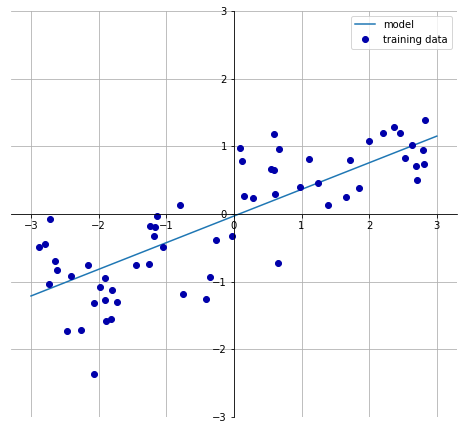

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
X,y = mglearn.datasets.make_wave(n_samples=60)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [6]:
lr = LinearRegression().fit(X_train,y_train)

“斜率”参数（w,也叫做权重或**系数**）被保存在coef_属性中，而偏移或截距（b）被保存在intercept_属性中  
在scikit-learn中总是将从训练数据中得到的值保存在下划线结尾的属性中，为了将其与用户设置的数据分开

In [7]:
print("lr.coef_{}".format(lr.coef_))
print("lr.intercept_{}".format(lr.intercept_))

lr.coef_[0.39390555]
lr.intercept_-0.031804343026759746


intercept_属性是一个浮点数，而coef_属性是一个Numpy数组，每个元素对应一个输入特征。  
wave数据集只有一个输入特征

In [8]:
print("Train set score : {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score : {:.2f}".format(lr.score(X_test,y_test)))

Train set score : 0.67
Test set score : 0.66


训练集和测试集上的score非常接近，说明可能存在欠拟合
- 对于一维数据来说，过拟合风险很小，因为模型非常简单（或者受限）
- 对于更高维的数据集（即有大量特征的数据集），线性模型将会变得更加强大，过拟合的可能性也会变大。

## 波士顿房价数据集
506个样本，105个导出特征

In [9]:
X,y=mglearn.datasets.load_extended_boston()

In [10]:
X.shape

(506, 104)

In [11]:
y.shape

(506,)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [13]:
lr = LinearRegression().fit(X_train,y_train)

In [14]:
print("Train set score : {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score : {:.2f}".format(lr.score(X_test,y_test)))

Train set score : 0.93
Test set score : 0.86


训练集和测试集之间的性能差异是过拟合的明显标志，过拟合，过分依赖训练数据，应该找一个可以控制复杂度的模型。标准线性回归最常用的替代方法就是**岭回归**

In [15]:
from sklearn.linear_model import Ridge

In [16]:
ridge = Ridge().fit(X_train,y_train)

In [17]:
print("Training set score : {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score : {:.2f}".format(ridge.score(X_test,y_test)))

Training set score : 0.87
Test set score : 0.77


Ridge在训练集上的分数要低于在LinearRegression，但是在测试集上的分数更高。  
线性回归对数据存在过拟合。  
Ridge是一种约束更强的模型，所以不容易出现过拟合。  
复杂度更小的模型意味在训练集上性能更差，**但泛化性能更好**。  
<br/>
简单性和训练集性能二者对于模型的重要程度可以通过设置alpha参数来指定。默认alpha=1.0。  
增大alpha会使得系数更加趋向于0，从而降低训练集性能，但可能会提高泛化性能。

In [18]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score : {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score : {:.2f}".format(ridge.score(X_test,y_test)))

Training set score : 0.87
Test set score : 0.77


In [19]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score : {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score : {:.2f}".format(ridge.score(X_test,y_test)))
#alpha很小，得到一个与LinearRegression类似的模型

Training set score : 0.87
Test set score : 0.77


可以查看alpha去不同值时候的coef_属性，从而更加定性的理解alpha是如何改变模型的。

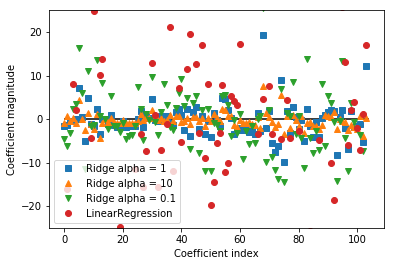

In [20]:
plt.plot(ridge.coef_,'s',label="Ridge alpha = 1")
plt.plot(ridge10.coef_,'^',label="Ridge alpha = 10")
plt.plot(ridge01.coef_,'v',label="Ridge alpha = 0.1")

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

In [21]:
ridge.coef_

array([-1.68270928e+00, -1.29909793e+00, -3.37326569e-01, -3.27281346e-01,
        1.97445701e-02,  7.25503888e+00,  4.51187561e-01, -5.07651830e+00,
        4.83020243e+00, -1.11063562e+00, -1.58928957e+00,  2.20720518e+00,
       -3.49382863e+00,  1.28275586e-01,  9.04915407e-03, -1.03142450e+00,
        9.57440281e-01, -1.42261565e+00, -1.91785931e+00, -1.37284303e+00,
       -3.77977292e-01, -1.92862786e+00, -1.65916940e+00, -1.49395708e+00,
       -1.65827416e+00, -4.61338861e-02,  1.83350634e+00, -1.82261656e+00,
        8.00431516e-01,  1.71921042e-01,  4.65550970e+00, -2.65552622e-01,
       -4.43657831e-01,  7.18683944e-01,  1.48306089e-01,  6.98694856e-01,
       -8.02117911e-01, -1.42985092e+00,  1.70356850e+00,  2.31318026e+00,
        9.32545834e-01, -2.54609332e+00,  2.29056622e+00, -3.83045124e+00,
        1.64339341e+00,  2.74941906e+00, -2.17480538e+00,  6.59725391e-01,
       -3.52230393e+00, -3.27281346e-01, -4.10384693e+00,  1.48130544e+00,
       -1.54608142e-01, -

x=0,对应的第一个特征系数，x=1对应的第二个特征系数，y轴表示该系数具体的数值。  
还有一种方法可以用来理解正则化的影响，就是固定alpha的值，但改变训练数据量。

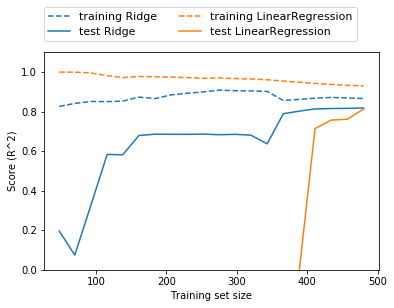

In [22]:
mglearn.plots.plot_ridge_n_samples()